In [1]:
import os
import pandas as pd
import datetime
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties
chinese_font = FontProperties(fname=r"C:\Windows\Fonts\STCAIYUN.TTF")
import seaborn as sns
import random
import plotly.express as px
from sklearn import preprocessing

In [47]:
chinese_font = FontProperties(fname=r"C:\Windows\Fonts\msyh.ttc")
colors = {
    'colors_hunli' : [(239/255, 214/255, 209/255), (196/255, 212/255, 202/255), (222/255, 233/255, 235/255)],
    'colors_meizi' : [(244/255/255, 231/255, 225/255), (240/255, 220/255, 221/255), (229/255, 194/255, 190/255), (206/255, 161/255, 168/255)],
    'colors_hailan' : [(223/255, 234/255, 250/255), (193/255, 217/255, 247/255), (105/255, 139/255, 184/255), (81/255, 109/255, 146/255)],
    'colors_chunri' : [(248/255, 202/255, 153/255), (247/255, 230/255, 116/255), (223/255, 229/255, 167/255), (224/255, 239/255, 234/255)],
    'colors_mocha' : [(187/255, 194/255, 163/255), (140/255, 177/255, 160/255), (115/255, 135/255, 110/255), (88/255, 111/255, 93/255)],
    'colors_haiyan' : [(220/255, 231/255, 249/255), (179/255, 216/255, 224/255), (203/255, 220/255, 210/255), (160/255, 205/255, 229/255)],
    'colors_monai' : [(168/255, 198/255, 206/255), (148/255, 194/255, 209/255), (114/255, 164/255, 191/255), (147/255, 164/255, 194/255)]
}

In [3]:
def helix_to_rgb(helix_color):
    r = int(helix_color[0:2], 16) / 255.0
    g = int(helix_color[2:4], 16) / 255.0
    b = int(helix_color[4:6], 16) / 255.0
    return (r, g, b)

# Example helix color
colors_helix = {
'purples' : ['D8C2CD', 'C0ADC6', 'AEA2C6', '9999C3','7882BB'],
'shuilian': ['A1AD7A','F8C76C','D88D7D','77A3A0','506159']
}

# Convert to RGB form
for name, color in colors_helix.items():
    for i, c in enumerate(color):
        color[i] = helix_to_rgb(c)

In [95]:
path = 'merged_data_with_star.csv'
df = pd.read_csv(path)

C:\Users\Eason\AppData\Local\Temp\ipykernel_47420\2186094720.py:2: DtypeWarning:

Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
df.head()

,cUid,cUname,cParentArea,cArea,type,sendDate,message,price,count,uid,time,hour,day,dayOfWeek,year,star
0,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319912043,wow有舰长,NaN,NaN,0,2023-07-03 01:45:12.043,1,3,1,2023,5.0
1,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319960241,[https://i0.hdslb.com/bfs/live/abedc05607b70a8...,NaN,NaN,0,2023-07-03 01:46:00.241,1,3,1,2023,2.0
2,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320090560,点播 触电,NaN,NaN,0,2023-07-03 01:48:10.560,1,3,1,2023,4.0
3,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320127436,[https://i0.hdslb.com/bfs/live/752c09547574aeb...,NaN,NaN,0,2023-07-03 01:48:47.436,1,3,1,2023,3.0
4,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320381467,有睫毛刷嘛,NaN,NaN,0,2023-07-03 01:53:01.467,1,3,1,2023,2.0


In [6]:
unique_uid_count = df["cUid"].nunique()
unique_uid_count

17566

In [7]:
unique_uname_count = df["cUname"].nunique()
unique_uname_count

17099

### 分析弹幕数据

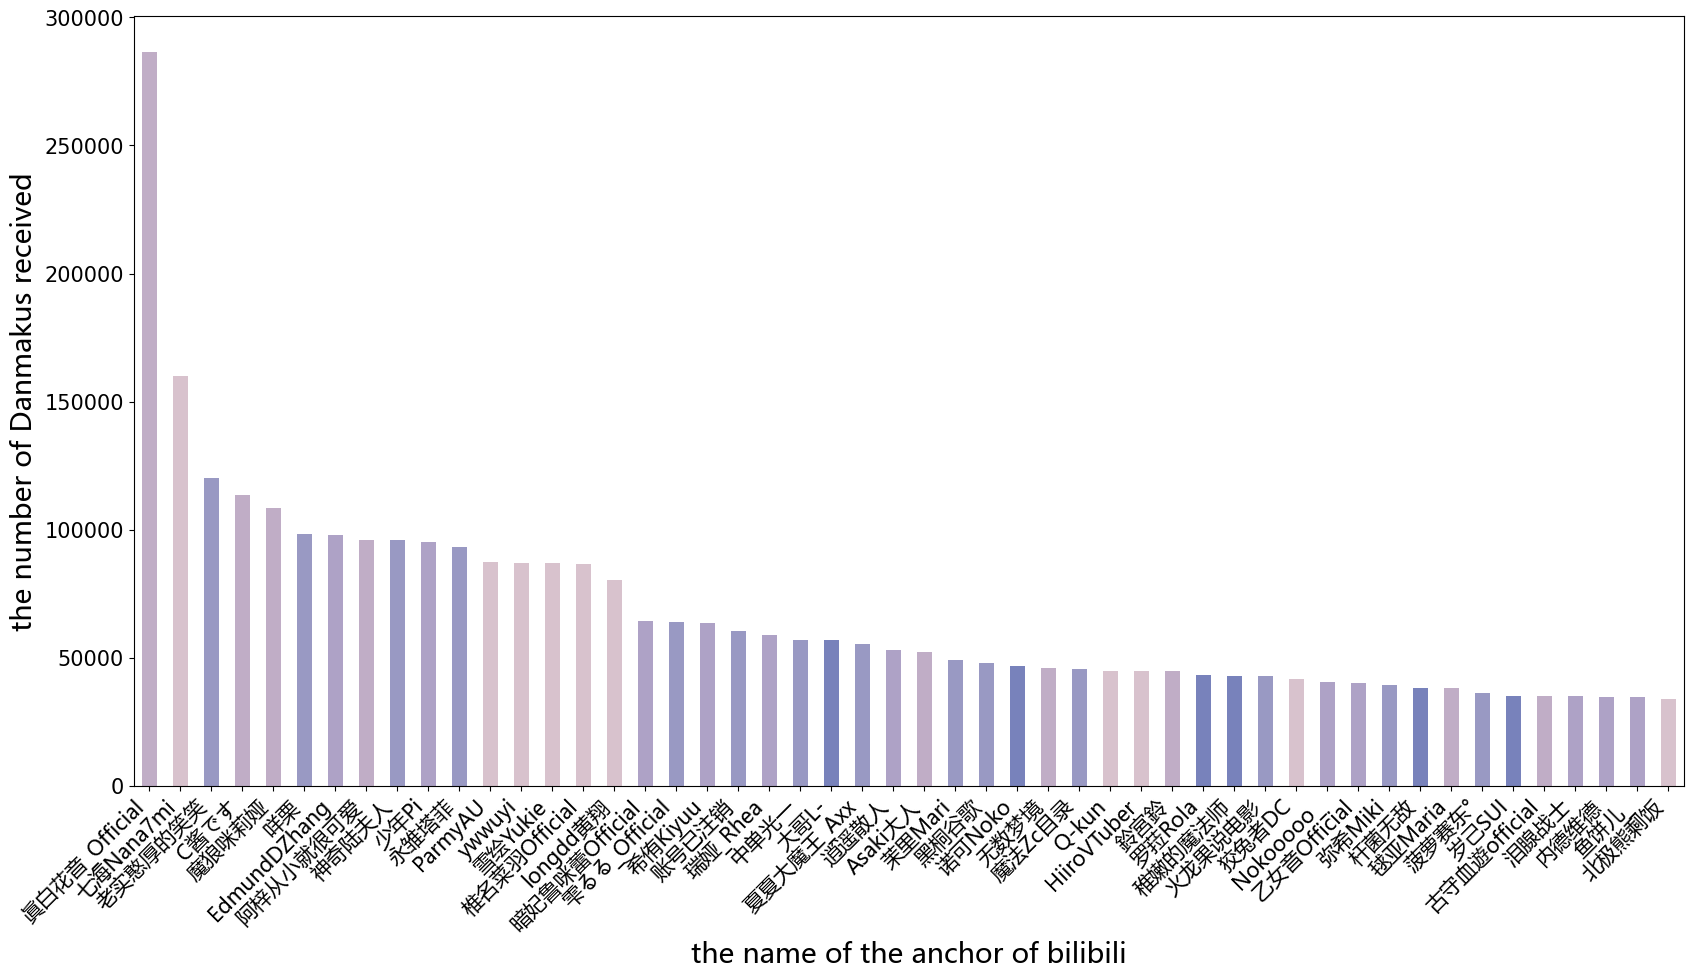

In [42]:
num = 50
data = df.cUname.value_counts()[:num]
coleurs = random.choices(colors_helix['purples'], k=50)
ax = data.plot(kind="bar", figsize=(20,10), fontsize=15, color=coleurs)
ax.set_xticklabels(data.index, fontproperties=chinese_font, fontsize=15, rotation=45, ha='right')
ax.set_xlabel('the name of the anchor of bilibili', fontsize=20, fontproperties=chinese_font)
ax.set_ylabel('the number of Danmakus received', fontsize=20, fontproperties=chinese_font)
# Show the plot
plt.show()

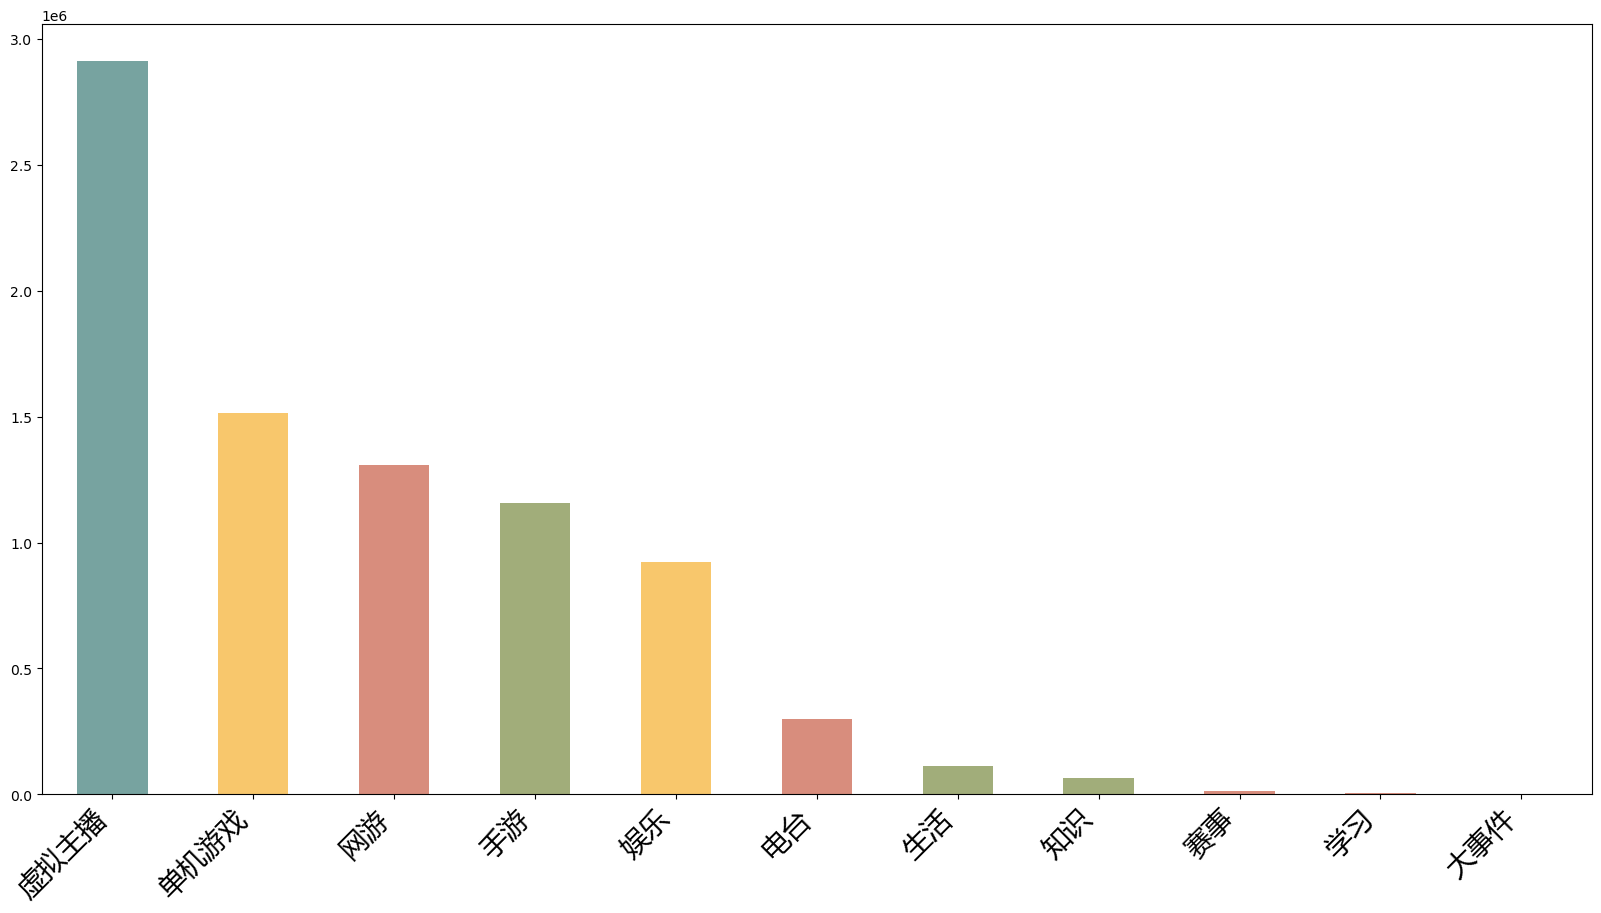

In [11]:
data = df.cParentArea.value_counts()
num = len(data)
coleurs = random.choices(colors_helix['shuilian'], k=num)
ax = data.plot(kind="bar", figsize=(20,10), color=coleurs)
ax.set_xticklabels(data.index, fontproperties=chinese_font, fontsize=20, rotation=45, ha='right')
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:e}"))
# Show the plot
plt.show()

In [8]:
data

虚拟主播    2913243
单机游戏    1516616
网游      1308710
手游      1156219
娱乐       923372
电台       300821
生活       112537
知识        62961
赛事        14840
学习         3269
大事件         685
Name: cParentArea, dtype: int64

#### 这里的饼状图可能需要ppt单独做

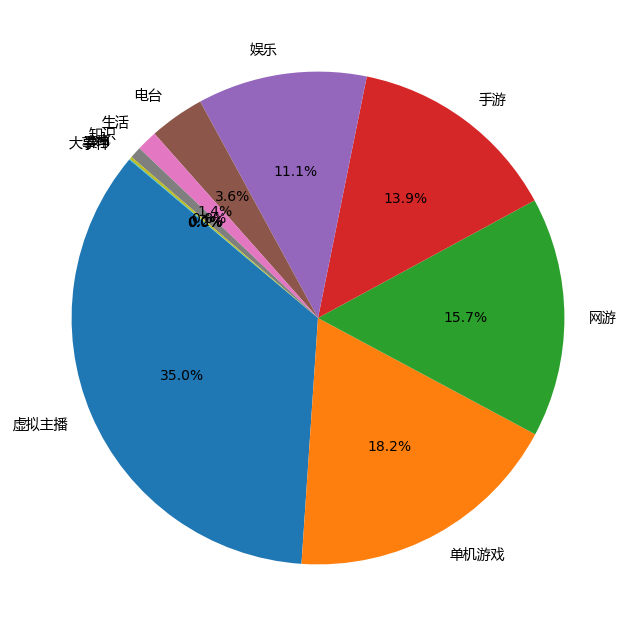

In [12]:
# data = data.sample(frac=1)
couleurs = colors_helix['purples']+colors['colors_mocha']+colors['colors_monai']
random.shuffle(couleurs)
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
pie_chart = plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
# Set the title
# plt.title('Pie Chart of a Pandas Series')
plt.setp(pie_chart[1], fontproperties=chinese_font)
# Show the plot
plt.show()


In [14]:
percentages = [float(label.get_text().strip('%')) for label in pie_chart[2]]
categories = data.index.tolist()

# 创建一个包含百分比和分区的字典
data_dict = {'Category': categories, 'Percentage': percentages}

# 创建DataFrame
df = pd.DataFrame(data_dict)

# 打印DataFrame
df

,Category,Percentage
0,虚拟主播,35.0
1,单机游戏,18.2
2,网游,15.7
3,手游,13.9
4,娱乐,11.1
5,电台,3.6
6,生活,1.4
7,知识,0.8
8,赛事,0.2
9,学习,0.0


### 处理时间

In [17]:
df['time'] = df['sendDate'].apply(lambda x : str(datetime.datetime.fromtimestamp(float(x) / 1000)))
df['time'] = pd.to_datetime(df['time'])

In [18]:
df['hour'] = df['time'].dt.hour
df['day'] = df['time'].dt.day
df['dayOfWeek'] = df['time'].dt.dayofweek + 1
df['year'] = df['time'].dt.year

In [19]:
df.head()

,cUid,cUname,cParentArea,cArea,type,sendDate,message,price,count,uid,time,hour,day,dayOfWeek,year,star
0,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319912043,wow有舰长,NaN,NaN,0,2023-07-03 01:45:12.043,1,3,1,2023,5.0
1,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319960241,[https://i0.hdslb.com/bfs/live/abedc05607b70a8...,NaN,NaN,0,2023-07-03 01:46:00.241,1,3,1,2023,2.0
2,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320090560,点播 触电,NaN,NaN,0,2023-07-03 01:48:10.560,1,3,1,2023,4.0
3,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320127436,[https://i0.hdslb.com/bfs/live/752c09547574aeb...,NaN,NaN,0,2023-07-03 01:48:47.436,1,3,1,2023,3.0
4,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320381467,有睫毛刷嘛,NaN,NaN,0,2023-07-03 01:53:01.467,1,3,1,2023,2.0


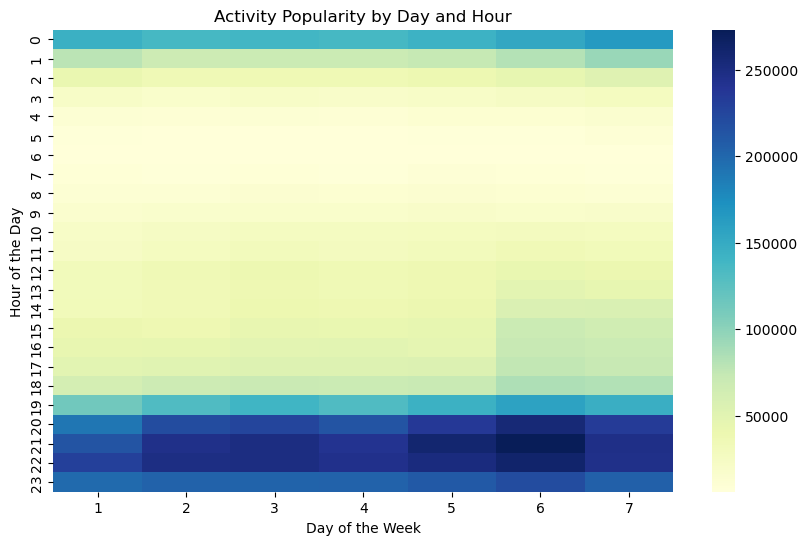

In [20]:
#按星期几
pivot_table = df.pivot_table(index='hour', columns='dayOfWeek', aggfunc='size')

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.heatmap(data=pivot_table, cmap='YlGnBu', fmt="d")

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.title('Activity Popularity by Day and Hour')

# Show the plot
plt.show()

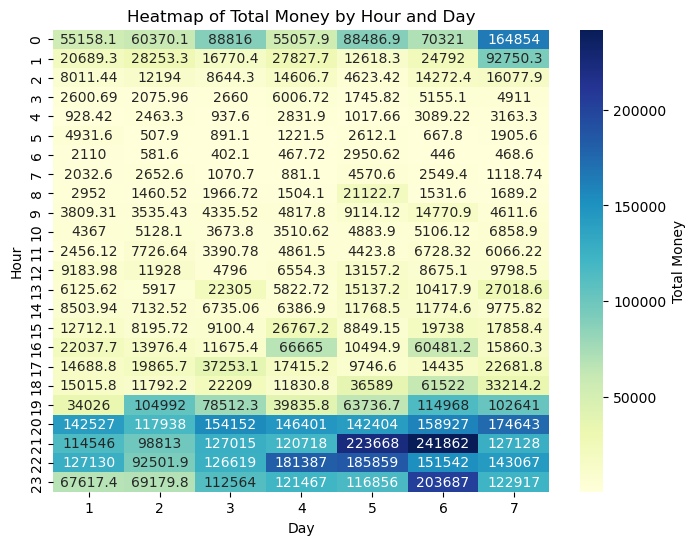

In [23]:
pivot_table = df.pivot_table(values='price', index='hour', columns='dayOfWeek', aggfunc='sum')

# Draw the heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Total Money'})
plt.title('Heatmap of Total Money by Hour and Day')
plt.xlabel('Day')
plt.ylabel('Hour')

# Show the plot
plt.show()

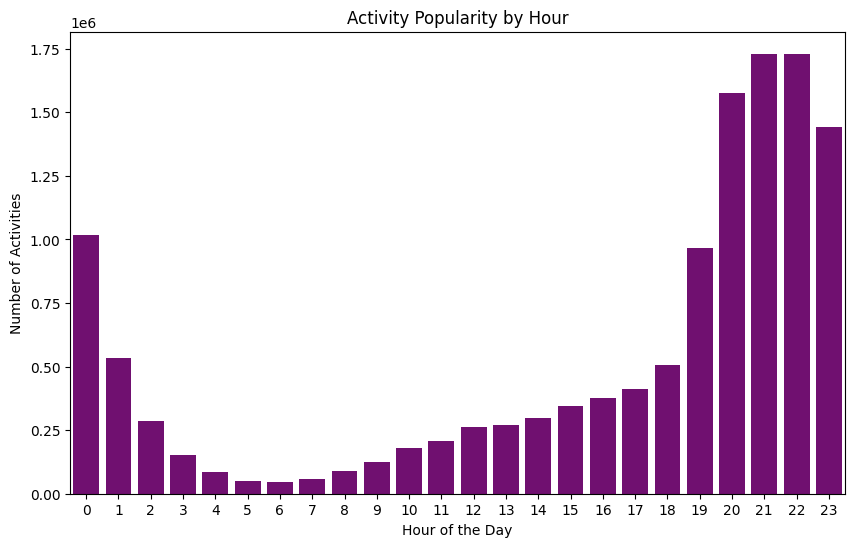

In [16]:
hour_counts = df['hour'].value_counts().sort_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=hour_counts.index, y=hour_counts.values, color='purple')

# Set labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Activities')
plt.title('Activity Popularity by Hour')

# Optionally show the count values on top of the bars
# for index, value in enumerate(hour_counts):
#     plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.show()

### 真白花音

In [24]:
df.head()

,cUid,cUname,cParentArea,cArea,type,sendDate,message,price,count,uid,time,hour,day,dayOfWeek,year,star
0,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319912043,wow有舰长,NaN,NaN,0,2023-07-03 01:45:12.043,1,3,1,2023,5.0
1,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319960241,[https://i0.hdslb.com/bfs/live/abedc05607b70a8...,NaN,NaN,0,2023-07-03 01:46:00.241,1,3,1,2023,2.0
2,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320090560,点播 触电,NaN,NaN,0,2023-07-03 01:48:10.560,1,3,1,2023,4.0
3,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320127436,[https://i0.hdslb.com/bfs/live/752c09547574aeb...,NaN,NaN,0,2023-07-03 01:48:47.436,1,3,1,2023,3.0
4,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320381467,有睫毛刷嘛,NaN,NaN,0,2023-07-03 01:53:01.467,1,3,1,2023,2.0


In [25]:
specific_cname = '眞白花音_Official'
df_specific = df[df.cUname == specific_cname]
df_specific.head()

,cUid,cUname,cParentArea,cArea,type,sendDate,message,price,count,uid,time,hour,day,dayOfWeek,year,star
5177,401480763,眞白花音_Official,NaN,NaN,4,1660055037678,NaN,NaN,NaN,101,2022-08-09 22:23:57.678,22,9,2,2022,4.0
11790,401480763,眞白花音_Official,NaN,NaN,4,1660491113791,NaN,NaN,NaN,115,2022-08-14 23:31:53.791,23,14,7,2022,4.0
11812,401480763,眞白花音_Official,NaN,NaN,4,1659706980152,NaN,NaN,NaN,115,2022-08-05 21:43:00.152,21,5,5,2022,4.0
13748,401480763,眞白花音_Official,NaN,NaN,0,1620233401000,草,NaN,NaN,115,2021-05-06 00:50:01.000,0,6,4,2021,2.0
13749,401480763,眞白花音_Official,NaN,NaN,0,1620233446000,草,NaN,NaN,115,2021-05-06 00:50:46.000,0,6,4,2021,2.0


In [26]:
data = df_specific['type'].value_counts()
data.sort_index(inplace=True)
data.drop(9, inplace=True)
index = ['弹幕','礼物','舰长','超级弹幕','进场信息']
data.index = index
fig = px.funnel(data.sort_values(ascending=False), title="Analyse of: " + specific_cname)
fig.show()

In [27]:
users = df_specific.uid.value_counts()
users_df = users.to_frame().rename(columns={'uid': 'number'})
users_df.head()

,number
908,185268
207453,31499
200034,9160
100594,3907
208281,2926


In [29]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("techthiyanes/chinese_sentiment")
model = AutoModelForSequenceClassification.from_pretrained("techthiyanes/chinese_sentiment")
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = model.to(device)

'HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /techthiyanes/chinese_sentiment/resolve/main/tokenizer_config.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000173A9406C80>, 'Connection to huggingface.co timed out. (connect timeout=10)'))' thrown while requesting HEAD https://huggingface.co/techthiyanes/chinese_sentiment/resolve/main/tokenizer_config.json
'HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /techthiyanes/chinese_sentiment/resolve/main/config.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000173A9406FE0>, 'Connection to huggingface.co timed out. (connect timeout=10)'))' thrown while requesting HEAD https://huggingface.co/techthiyanes/chinese_sentiment/resolve/main/config.json
'HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /techthiyanes/chinese_sentiment/resolve/main/pytorch_model.bin (

ConnectTimeout: HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /techthiyanes/chinese_sentiment/resolve/main/tf_model.h5 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000173658D8D00>, 'Connection to huggingface.co timed out. (connect timeout=10)'))

In [125]:
inputs = tokenizer(text=["真的很不错","verygood"], return_tensors="pt",is_split_into_words=False, padding=True, truncation=True).to(device)

with torch.no_grad():
    logits = model(**inputs).logits

# predicted_class_ids = torch.arange(0, logits.shape[-1])[torch.sigmoid(logits).squeeze(dim=0) > 0.5]
predicted_class_id = torch.argmax(logits, dim=1)
print(logits)
print(predicted_class_id)

tensor([[-2.3106, -1.2821, -0.3190,  1.0394,  1.6060],
        [-2.7756, -1.6877,  0.3978,  2.7002,  0.9290]], device='cuda:0')
tensor([4, 3], device='cuda:0')


In [129]:
np.array(predicted_class_id.cpu())

array([4, 3], dtype=int64)

In [165]:
total_num = df.shape[0]
for i in tqdm(range(0, total_num-1024, 1024)):
    index_list = list(range(i, i+1024))
    # Randomly pick 3 elements from the list
    random_index = random.sample(index_list, 128)
    messages = [df.loc[j, 'message'] if df.iloc[j, 4] == 0 else "NAN" for j in random_index]
    inputs = tokenizer(messages, return_tensors="pt", is_split_into_words=False, padding=True, truncation=True).to(device)
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class_id = torch.argmax(logits, dim=1)
    df.loc[random_index, 'star'] = np.array(predicted_class_id.cpu()) + 1

df.to_csv('merged_data_with_star.csv', index=False)

In [30]:
stars = df.star.dropna()

<AxesSubplot:>

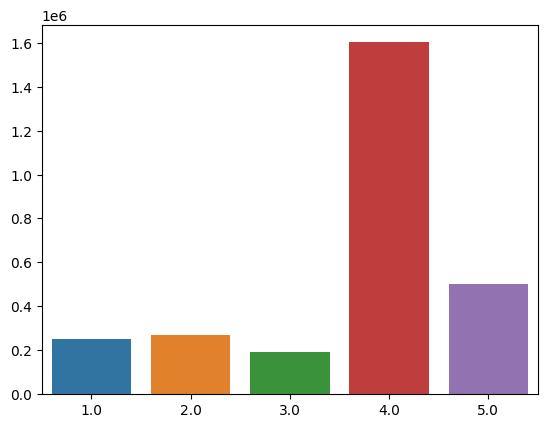

In [173]:
stars.value_counts()
sns.barplot(x=stars.value_counts().index, y=stars.value_counts().values)

In [145]:
predicted_class_id

tensor([3, 4, 3,  ..., 3, 3, 3], device='cuda:0')

### 用户分类

In [31]:
df.head()

,cUid,cUname,cParentArea,cArea,type,sendDate,message,price,count,uid,time,hour,day,dayOfWeek,year,star
0,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319912043,wow有舰长,NaN,NaN,0,2023-07-03 01:45:12.043,1,3,1,2023,5.0
1,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319960241,[https://i0.hdslb.com/bfs/live/abedc05607b70a8...,NaN,NaN,0,2023-07-03 01:46:00.241,1,3,1,2023,2.0
2,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320090560,点播 触电,NaN,NaN,0,2023-07-03 01:48:10.560,1,3,1,2023,4.0
3,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320127436,[https://i0.hdslb.com/bfs/live/752c09547574aeb...,NaN,NaN,0,2023-07-03 01:48:47.436,1,3,1,2023,3.0
4,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320381467,有睫毛刷嘛,NaN,NaN,0,2023-07-03 01:53:01.467,1,3,1,2023,2.0


In [65]:
df_classification = df.copy()
df_classification['cParentArea'] = pd.factorize(df['cParentArea'])[0] + 1
df_classification['cArea'] = pd.factorize(df['cArea'])[0] + 1
df_classification = df_classification[["cParentArea", "type", "price", "uid", "hour", "dayOfWeek", "year", "star"]]

In [66]:
df_classification.head()

,cParentArea,type,price,uid,hour,dayOfWeek,year,star
0,1,0,NaN,0,1,1,2023,5.0
1,1,0,NaN,0,1,1,2023,2.0
2,1,0,NaN,0,1,1,2023,4.0
3,1,0,NaN,0,1,1,2023,3.0
4,1,0,NaN,0,1,1,2023,2.0


In [67]:
df_classification_danmu = df_classification[df_classification['type'] == 0]
df_classification_danmu = df_classification_danmu[["cParentArea", "uid"]]
df_danmu_encoded = pd.get_dummies(df_classification_danmu, columns=['cParentArea'], prefix=['cParentArea'])
df_danmu_encoded.fillna(0, inplace=True)
df_danmu_encoded.head()

,uid,cParentArea_0,cParentArea_1,cParentArea_2,cParentArea_3,cParentArea_4,cParentArea_5,cParentArea_6,cParentArea_7,cParentArea_8,cParentArea_9,cParentArea_10,cParentArea_11
0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0


In [68]:
df_uid = df_danmu_encoded.groupby("uid")[df_danmu_encoded.columns.values[1:]].sum()

In [69]:
df_uid

,cParentArea_0,cParentArea_1,cParentArea_2,cParentArea_3,cParentArea_4,cParentArea_5,cParentArea_6,cParentArea_7,cParentArea_8,cParentArea_9,cParentArea_10,cParentArea_11
uid,,,,,,,,,,,,
0,0,4218,16,692,1136,2154,0,0,0,0,0,0
2,428,0,8,16,0,30,42,0,0,0,0,0
3,0,0,2,0,0,0,2,0,0,0,0,0
4,6,0,0,0,0,0,42,0,0,2,0,0
5,250,10,28,0,6,24,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
600039818,0,0,0,0,0,10,0,0,0,0,0,0
690797546,288,32,2,0,2,788,60,0,0,0,0,0
700000020,27,0,0,0,2,0,0,0,0,0,0,0


In [70]:
columns=df_uid.columns.tolist()
cols = columns
cols

['cParentArea_0',
 'cParentArea_1',
 'cParentArea_2',
 'cParentArea_3',
 'cParentArea_4',
 'cParentArea_5',
 'cParentArea_6',
 'cParentArea_7',
 'cParentArea_8',
 'cParentArea_9',
 'cParentArea_10',
 'cParentArea_11']

In [71]:
normalized_df = preprocessing.normalize(df_uid, norm='l2')

In [72]:
df_uid = pd.DataFrame(normalized_df, columns = cols)
df_uid

,cParentArea_0,cParentArea_1,cParentArea_2,cParentArea_3,cParentArea_4,cParentArea_5,cParentArea_6,cParentArea_7,cParentArea_8,cParentArea_9,cParentArea_10,cParentArea_11
0,0.000000,0.857415,0.003252,0.140667,0.230921,0.437855,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.991953,0.000000,0.018541,0.037082,0.000000,0.069529,0.097341,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.707107,0.0,0.0,0.000000,0.0,0.0
3,0.141264,0.000000,0.000000,0.000000,0.000000,0.000000,0.988851,0.0,0.0,0.047088,0.0,0.0
4,0.988243,0.039530,0.110683,0.000000,0.023718,0.094871,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16037,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
16038,0.342150,0.038017,0.002376,0.000000,0.002376,0.936160,0.071281,0.0,0.0,0.000000,0.0,0.0
16039,0.997268,0.000000,0.000000,0.000000,0.073872,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
16040,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0


In [73]:
from sklearn.cluster import KMeans
est = KMeans(n_clusters=11, random_state=4444).fit(df_uid)

d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [74]:
df_uid['cluster'] = est.labels_
df_uid.head()

,cParentArea_0,cParentArea_1,cParentArea_2,cParentArea_3,cParentArea_4,cParentArea_5,cParentArea_6,cParentArea_7,cParentArea_8,cParentArea_9,cParentArea_10,cParentArea_11,cluster
0,0.000000,0.857415,0.003252,0.140667,0.230921,0.437855,0.000000,0.0,0.0,0.000000,0.0,0.0,7
1,0.991953,0.000000,0.018541,0.037082,0.000000,0.069529,0.097341,0.0,0.0,0.000000,0.0,0.0,0
2,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.707107,0.0,0.0,0.000000,0.0,0.0,3
3,0.141264,0.000000,0.000000,0.000000,0.000000,0.000000,0.988851,0.0,0.0,0.047088,0.0,0.0,3
4,0.988243,0.039530,0.110683,0.000000,0.023718,0.094871,0.000000,0.0,0.0,0.000000,0.0,0.0,0


In [75]:
df_uid.cluster.value_counts()

0     4833
1     2318
5     1909
2     1764
3     1515
7     1184
4      672
9      627
10     495
6      407
8      318
Name: cluster, dtype: int64

In [76]:
value_counts = df_uid.cluster.value_counts()
percentage_values = (value_counts / 16037) * 100
for value, count in value_counts.items():
    percentage = percentage_values[value]
    print(f"{percentage:.2f}%")

30.14%
14.45%
11.90%
11.00%
9.45%
7.38%
4.19%
3.91%
3.09%
2.54%
1.98%


In [77]:
# 设置中文字体为微软雅黑
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

# 处理坐标轴负号显示问题
plt.rcParams['axes.unicode_minus'] = False

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


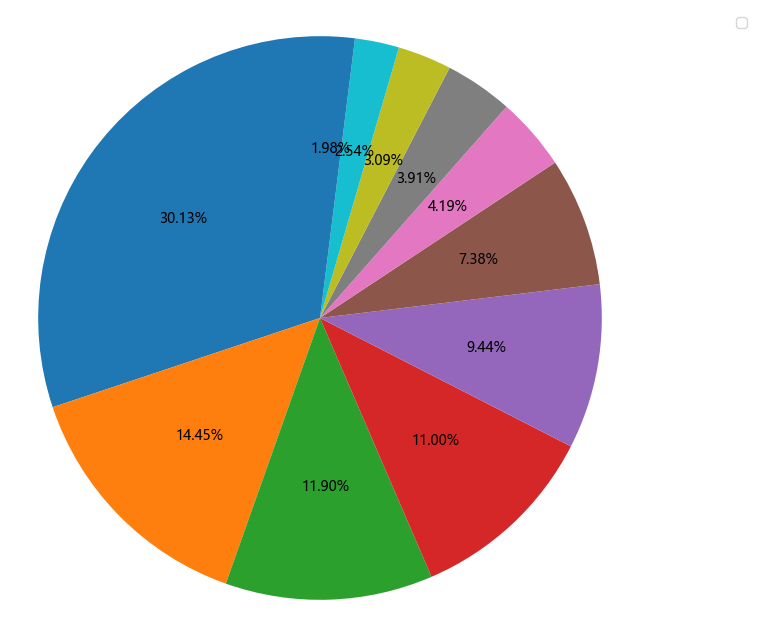

In [80]:
percentages = list(value_counts)
# 绘制饼状图
plt.figure(figsize=(8, 8))  # 可选：设置图形大小
pie_chart = plt.pie(percentages, autopct='%.2f%%', startangle=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')  # 让饼状图保持圆形
plt.setp(pie_chart[1], fontproperties=chinese_font)
# 显示图形
plt.show()


### 付费用户

In [96]:
df.head()

,cUid,cUname,cParentArea,cArea,type,sendDate,message,price,count,uid,time,hour,day,dayOfWeek,year,star
0,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319912043,wow有舰长,NaN,NaN,0,2023-07-03 01:45:12.043,1,3,1,2023,5.0
1,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319960241,[https://i0.hdslb.com/bfs/live/abedc05607b70a8...,NaN,NaN,0,2023-07-03 01:46:00.241,1,3,1,2023,2.0
2,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320090560,点播 触电,NaN,NaN,0,2023-07-03 01:48:10.560,1,3,1,2023,4.0
3,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320127436,[https://i0.hdslb.com/bfs/live/752c09547574aeb...,NaN,NaN,0,2023-07-03 01:48:47.436,1,3,1,2023,3.0
4,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320381467,有睫毛刷嘛,NaN,NaN,0,2023-07-03 01:53:01.467,1,3,1,2023,2.0


In [97]:
df_uid_price = df[["uid", "price"]]
df_uid_price.fillna(0, inplace=True)
df_uid_price = df_uid_price.groupby('uid')['price'].sum()
df_uid_price.head()

C:\Users\Eason\AppData\Local\Temp\ipykernel_47420\2468035743.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



uid
0         0.00
1         0.00
2    345133.92
3         0.00
4        60.20
Name: price, dtype: float64

In [98]:
df_uid_price.value_counts()

0.00         29081
1.00           602
0.10           351
2.00           190
3.00           108
             ...  
102.40           1
240.80           1
4016.00          1
122.92           1
187867.00        1
Name: price, Length: 1708, dtype: int64

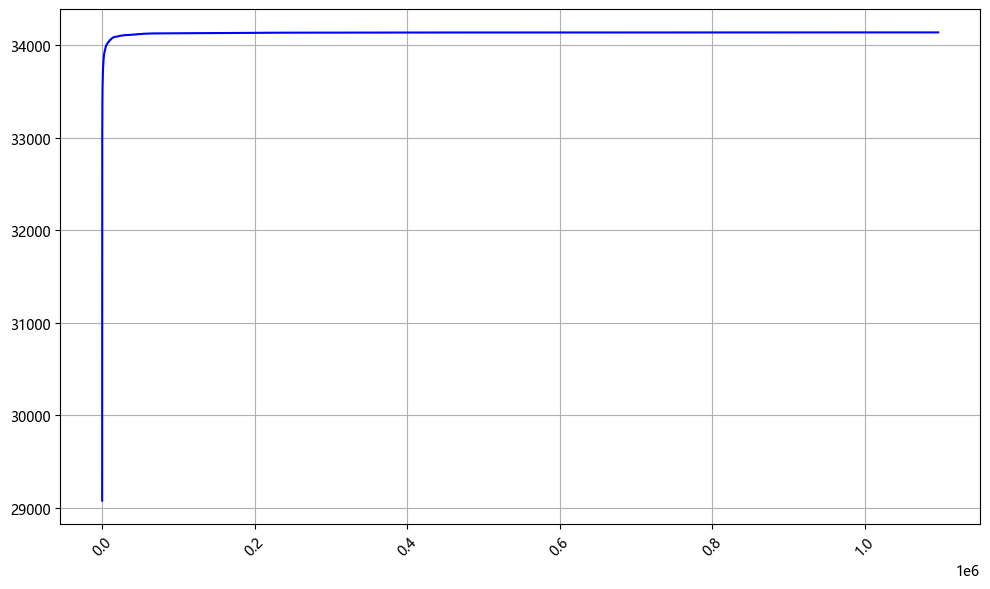

In [91]:
cumulative_sum = df_uid_price.value_counts().sort_index()[0:].cumsum()
# Plot the cumulative graph
plt.figure(figsize=(10, 6))
plt.plot(cumulative_sum.index.values, cumulative_sum.values, color='b')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


In [99]:
threshold = 100
uid_qualified = df_uid_price[df_uid_price > threshold].index.values
df_classification = df.copy()
df_classification = df_classification[df_classification['uid'].isin(uid_qualified)]
df_classification['cParentArea'] = pd.factorize(df_classification['cParentArea'])[0] + 1
# df_classification['cUname'] = pd.factorize(df['cUname'])[0] + 1
df_classification['cArea'] = pd.factorize(df_classification['cArea'])[0] + 1
df_classification = df_classification[["cArea", "type", "price", "uid", "hour", "dayOfWeek", "year", "star"]]

In [100]:
def compute_percentage(row):
    total = row.sum()
    return (row / total) * 100

# Apply the percentage computation function to each row using 'apply' with axis=1
percentage_df = df_uid.apply(compute_percentage, axis=1)

In [101]:
est = KMeans(n_clusters=11, random_state=4444).fit(percentage_df)

d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [102]:
percentage_df['cluster'] = est.labels_
percentage_df.head()

,cParentArea_0,cParentArea_1,cParentArea_2,cParentArea_3,cParentArea_4,cParentArea_5,cParentArea_6,cParentArea_7,cParentArea_8,cParentArea_9,cParentArea_10,cParentArea_11,cluster
0,0.000000,9.889324,0.037513,1.622431,2.663412,5.050167,0.000000,0.0,0.0,0.000000,0.0,0.0,1
1,81.679389,0.000000,1.526718,3.053435,0.000000,5.725191,8.015267,0.0,0.0,0.000000,0.0,0.0,6
2,0.000000,0.000000,16.018862,0.000000,0.000000,0.000000,16.018862,0.0,0.0,0.000000,0.0,0.0,5
3,3.381795,0.000000,0.000000,0.000000,0.000000,0.000000,23.672566,0.0,0.0,1.127265,0.0,0.0,5
4,78.616352,3.144654,8.805031,0.000000,1.886792,7.547170,0.000000,0.0,0.0,0.000000,0.0,0.0,6


In [103]:
percentage_df.cluster.value_counts()

0     3099
1     3026
2     2318
7     1905
3     1764
5     1514
6      912
9      682
4      328
8      282
10     212
Name: cluster, dtype: int64

In [104]:
value_counts = percentage_df.cluster.value_counts()
percentage_values = (value_counts / 16037) * 100
for value, count in value_counts.items():
    percentage = percentage_values[value]
    print(f"{percentage:.2f}%")

19.32%
18.87%
14.45%
11.88%
11.00%
9.44%
5.69%
4.25%
2.05%
1.76%
1.32%


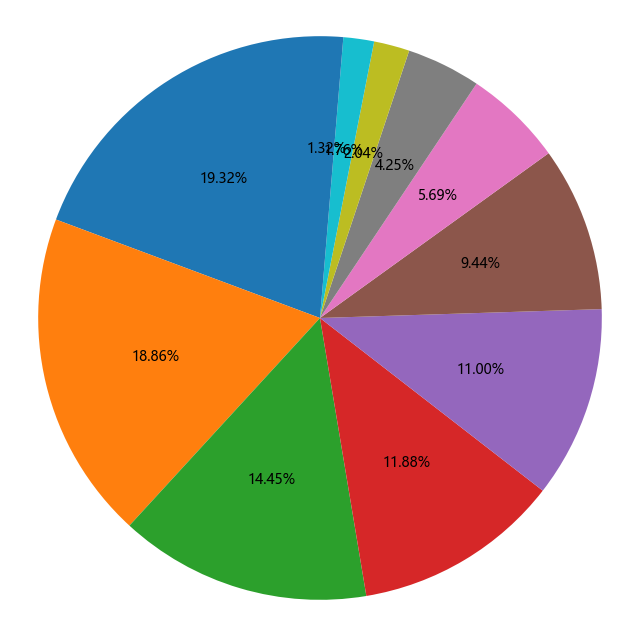

In [105]:
percentages = list(value_counts)
# 绘制饼状图
plt.figure(figsize=(8, 8))  # 可选：设置图形大小
pie_chart = plt.pie(percentages, autopct='%.2f%%', startangle=90)

plt.axis('equal')  # 让饼状图保持圆形
# plt.title('Pie Chart')  # 可选：设置图形标题
plt.setp(pie_chart[1], fontproperties=chinese_font)
# 显示图形
plt.show()
